In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
# loadtxt() 이용해서 diabetes.csv 읽어들임

import numpy as np

try:

    loaded_data = np.loadtxt('./diabetes.csv', delimiter=',')

    x_data = loaded_data[ :, 0:-1]
    t_data = loaded_data[ :, [-1]]

    print(x_data.shape, t_data.shape)

except Exception as err:

    print(str(err))

(759, 8) (759, 1)


이항분류를 다중분류 문제로 변경. one-hot encoding 하지 않음

In [ ]:
# Logistic Regression 을 keras 이용하여 생성
# 다중 분류이므로 출력층은  softmax 하수 적용

model = Sequential()

# 노드 2개인 출력층 생성
model.add(Dense(2, input_shape=(x_data.shape[1],), activation='softmax'))  

In [ ]:
# 학습을 위한 optimizer, 손실함수 loss 정의

model.compile(optimizer=SGD(learning_rate=0.01), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 18        
Total params: 18
Trainable params: 18
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit(x_data, t_data, epochs=500, validation_split=0.2, verbose=2)

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

Epoch 1/500
19/19 - 1s - loss: 0.6404 - accuracy: 0.6886 - val_loss: 0.6377 - val_accuracy: 0.6513
Epoch 2/500
19/19 - 0s - loss: 0.6250 - accuracy: 0.6952 - val_loss: 0.6256 - val_accuracy: 0.6776
Epoch 3/500
19/19 - 0s - loss: 0.6142 - accuracy: 0.6936 - val_loss: 0.6171 - val_accuracy: 0.6776
Epoch 4/500
19/19 - 0s - loss: 0.6062 - accuracy: 0.7002 - val_loss: 0.6108 - val_accuracy: 0.6842
Epoch 5/500
19/19 - 0s - loss: 0.6001 - accuracy: 0.6952 - val_loss: 0.6061 - val_accuracy: 0.6645
Epoch 6/500
19/19 - 0s - loss: 0.5955 - accuracy: 0.6952 - val_loss: 0.6023 - val_accuracy: 0.6711
Epoch 7/500
19/19 - 0s - loss: 0.5916 - accuracy: 0.6853 - val_loss: 0.5992 - val_accuracy: 0.6645
Epoch 8/500
19/19 - 0s - loss: 0.5885 - accuracy: 0.6853 - val_loss: 0.5966 - val_accuracy: 0.6645
Epoch 9/500
19/19 - 0s - loss: 0.5858 - accuracy: 0.6837 - val_loss: 0.5943 - val_accuracy: 0.6645
Epoch 10/500
19/19 - 0s - loss: 0.5834 - accuracy: 0.6804 - val_loss: 0.5921 - val_accuracy: 0.6645
Epoch 11/

In [ ]:
model.evaluate(x_data, t_data)

24/24 [==============================] - 0s 2ms/step - loss: 0.4749 - accuracy: 0.7681


[0.4748774468898773, 0.7681159377098083]

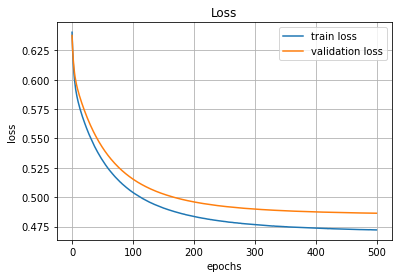

In [ ]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

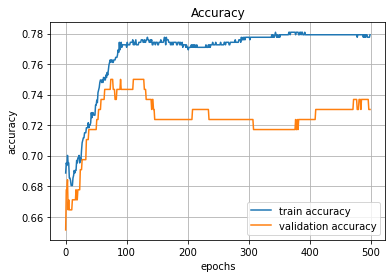

In [ ]:
import matplotlib.pyplot as plt

plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()